<a href="https://colab.research.google.com/github/AdrianoJesusDeveloper/AdrianoJesusDeveloper/blob/main/time_series_without_trendi_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ 1. Criando uma série temporal com tendência



<ipython-input-11-2299341488>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tempo = pd.date_range(start='2000-01', periods=240, freq='M')  # 20 anos


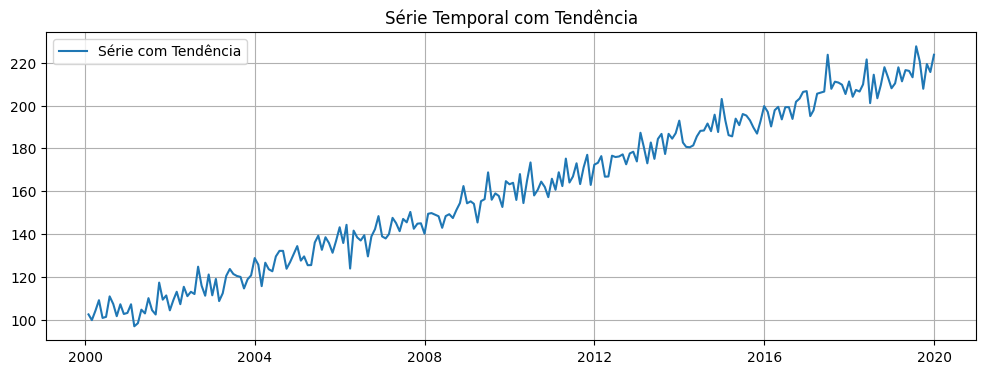

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Criando uma série temporal com tendência
np.random.seed(42)
tempo = pd.date_range(start='2000-01', periods=240, freq='M')  # 20 anos
tendencia_real = 0.5 * np.arange(len(tempo))  # tendência linear
ruido = np.random.normal(0, 5, len(tempo))    # ruído aleatório
serie = 100 + tendencia_real + ruido          # série com tendência

df = pd.DataFrame({'Data': tempo, 'Valor': serie})
df.set_index('Data', inplace=True)

# Plotando a série original
plt.figure(figsize=(12, 4))
plt.plot(df, label='Série com Tendência')
plt.title('Série Temporal com Tendência')
plt.legend()
plt.grid()
plt.show()

# ✅ 2. gerando um serie com tendencia estimada

In [12]:
# Regressão linear para remover a tendência
df['Tempo'] = np.arange(len(df)) # Criando uma coluna de tempo
modelo = sm.OLS(df['Valor'], sm.add_constant(df['Tempo'])) # Ajustando o modelo de regressão
resultado = modelo.fit() # Obtendo os resultados da regressão
df['Tendencia'] = resultado.fittedvalues # Valores ajustados da tendência
df['Detrended'] = df['Valor'] - df['Tendencia'] # Série sem tendência

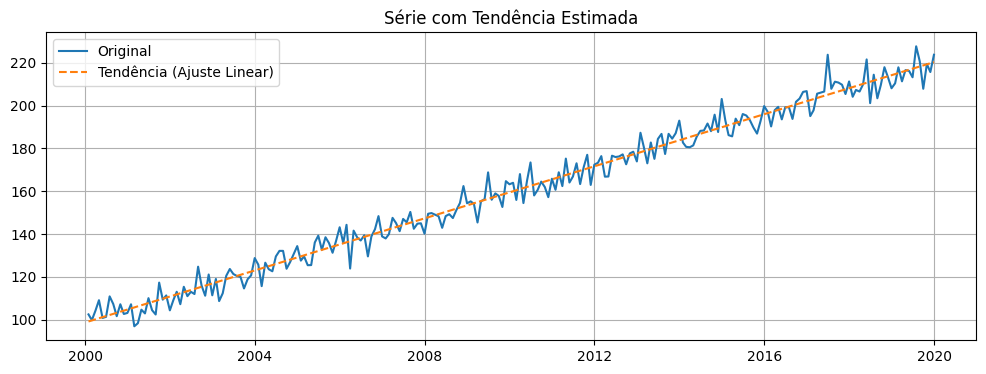

In [13]:
# Plotando série original e tendência
plt.figure(figsize=(12, 4)) # Tamanho da figura
plt.plot(df['Valor'], label='Original') # Plotando a série original
plt.plot(df['Tendencia'], label='Tendência (Ajuste Linear)', linestyle='--') # Plotando a tendência
plt.title('Série com Tendência Estimada') # Título do gráfico
plt.legend() # Adicionando legenda
plt.grid() # Adicionando grade
plt.show() # Plotando a série com tendência

# ✅ 3. Removendo a tendência (detrending):

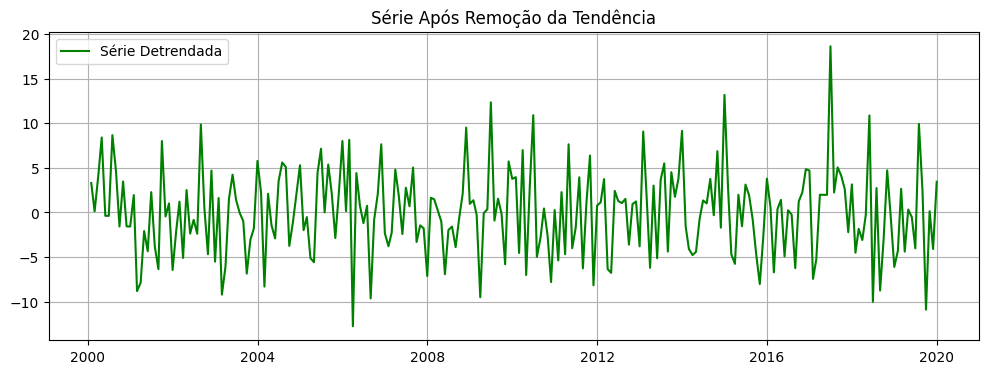

In [14]:
# Plotando a série sem tendência
plt.figure(figsize=(12, 4)) # Tamanho da figura
plt.plot(df['Detrended'], label='Série Detrendada', color='green') # Plotando a série detrendada
plt.title('Série Após Remoção da Tendência') # Título do gráfico
plt.legend() # Adicionando legenda
plt.grid() # Adicionando grade
plt.show() # Plotando a série sem tendência

# 🔍 Resultado:
#### O primeiro gráfico mostra os dados com a tendência (uma linha crescente com oscilações).

#### O segundo gráfico mostra a linha de tendência ajustada.

#### O terceiro gráfico mostra a série sem a tendência, ideal para analisar sazonalidades ou padrões residuais.